# OM x PSG - T-shirt Recognition Championship

Football (soccer) the most popular sport around the world, capable to induce many sentiments as happiness or angry. Everyone once time in your life have watched a football match. Some people can have a favorite team or not, but the fact is, football is played on the five continents and your world cup is a big party of the sport.  This sport played by 22 soccer players inside four lines became a world wide passion. On the other hand, we cannot to forget, the modern football is also a market environment with financial transactions and strategies. For many reasons football is always a present subject in our life, we found it by the TV, radio, internet, friends, neighbors and others sources. Soccer is everywhere.
 
The rivalry is another interesting feature of the soccer. In the football world we can see many rivalries developed during its long history. A derby for example is a match between two clubs knew by your rivalry.  For many football fans the derby is the most important match in the season. There are others things beyond the sport, the pride of the club and fans. Around the world the rivalries are figured between countries as Brazil x Argentine, football clubs from different cities as Barcelona x Real Madrid, clubs from the same city as Manchester United x Manchester City, but also the rivalries are present for the college, neighborhoods and friends teams. 

In France, it couldn’t be different, the rivalry is present in the hexagon. The well know “Le classique” has place every years, figured by the two of the most popular french teams, the Olympique de Marseille (OM) and the Paris Saint-Germain (PSG). The Olympique de Marseille is the most popular team in France, in your list of titles contains a Champions League, the most important competition for the football clubs in the world. In your long existence the club of the south spread across France due to your glorious history, the gold star above your logo has an important weight for the club. Despite your popularity, OM nowadays does not have a competitive team, but your supporters is the power of the club. The PSG on the other hand is the most rich french team. The club wants to entry in the hall of great teams of Europe. Always presenting good performances at international level, the PSG did never reach your main goal, became an European champion. Every year the PSG is faced with international failure. Regardless of your constant European failure, the club of the capital dominates the football at national level. 

With the objective to grow up this rivalry, in this notebook I propose a T-shirt Recognition Championship among these two teams. What is this competition? This is a simple competition composed by two match, the team which will have the more of goals will be the winner. How we measure the goals? For this competition I will to build two Convolution Neural Networks, one model built by hand and  other built from a pre-trained model.

**Problem Description**

Image recognition is nowadays a huge technique with many applications to vary problems. Here, we build a Convolutional Neural Network (CNN) capable to predict two class of image, cat and dog. We consider in this notebook a CNN that will be built for us and a CNN from a pre-trained network. The objective is to compare both models and select the best, considering some parameters as accuracy and loss function.

**Dataset Description**

The dataset is composed by 16000 images and two class, cat and dog. We consider two folders, one to training set with 8000 images and one to the test set with 8000 images. To make predictions, we consider some images that were not trained and tested before.

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf # To build the CNN

tf.__version__

from tensorflow import keras # Calling keras
from tensorflow.keras import layers # to create the layers of neurons
from tensorflow.keras.models import Sequential # to create the Neural Network
from keras.preprocessing.image import ImageDataGenerator # Image processing

# Data Preprocessing

## Loading the training and validation set

### Image and batch size

Before training the model, we must to set the image definition as height and width. We need also to define the batch size (the number of images to be trained in a batch).

- batch size = 32
- image height = 220
- image width = 220
- image size = (220, 220)

In [2]:
batch_size = 32
img_height = 220
img_width = 220

### Training and validation set

Loading the training and validation set from a specific path using Keras image prepocessing.

In [3]:
train_set = keras.preprocessing.image_dataset_from_directory(
  'Dataset/Training',
  seed=0,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1600 files belonging to 2 classes.


In [4]:
val_set = keras.preprocessing.image_dataset_from_directory(
  'Dataset/Validation',
  seed=0,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 800 files belonging to 2 classes.


### Class names

To verify the name of each class.

In [5]:
class_names = train_set.class_names
print('The teams in the game:', class_names)

The teams in the game: ['OM', 'PSG']


### Visualizing the data

As we can see, each image contains a T-shirt of each french team in different scenarios. Some characteristics will be relevant to this model as the team's logo and colors. The main objective to build a CNN model consists in to obtain more information about each image by the Convolutional process, if you have a large dataset your model tends to be better. The lack of images can have a negative role during the training process leading the model to the over fit, the model memorizes but does not learn. There are some solutions to avoid this problem as we will see below.

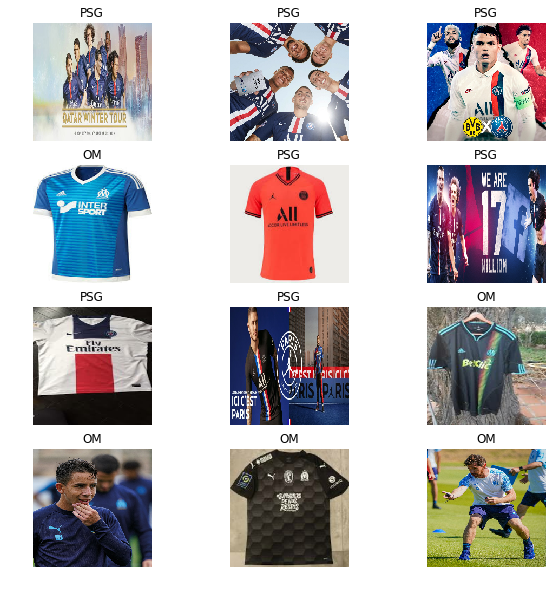

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
      for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

## Setting the dataset to improve the model performance

The dataset is not larger, for this reason we need to consider some actions as the Data Augumentation (this auguments the images in many angles, it can to avoid the overfit). The Autotune aids in the computional time improving the computer perfomance. The Standardization is also required due to the fact we build a classification model.

### Autotune

Here, we configure the dataset for a better computational performance, to know more details, [see](https://www.tensorflow.org/guide/data_performance).

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_set = val_set.cache().prefetch(buffer_size=AUTOTUNE)

### Standardization of the data

The standardization of the data is a very important step to build a CNN, due to consider a classification model, we must to have the data points in the same scale. When we consider an image, the pixels values varying between 0 and 255. We want to have values between 0 and 1,  to do it, we consider the image standardization.

In [8]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255) # object to rescale

### Data Augmentation

**From TensorFlow**

When you don't have a large image dataset, it's a good practice to artificially introduce sample diversity by applying random, yet realistic, transformations to the training images, such as rotation and horizontal flipping. This helps expose the model to different aspects of the training data and reduce overfitting.

In [9]:
# Data augmentation with keras sequential
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.4),
    layers.experimental.preprocessing.RandomZoom(0.4),
  ]
)

# Building the CNN model

To build a Convolutional Neural Network we must to set the convolution layer, pooling layer , flatten layer and finally the full connection (the neural network to proceed with the classification model).

**Convolution** this method creates filters applying the convolution. These filters is very useful in the learning process due to the variety of transformations, in this way the model can learn about each image in many perspectives. The number of filters and the size of receptive field must be defined.

**Pooling**  reduces the size of the matrix from the last step. There are two ways to employ it, considering the max or the mean pooling. In this model we consider the max pooling. In the pooling process we define the size of pooling kernel for example a matrix $(2,2)$, the max pooling consider the largest value. This technique gives considerable computational gains.

**Flatten** is a process that we transform the squared matrix into one dimensional array.

**Full connection** is the last step to build a CNN model. In this stage we connect the flatten vector to the first layer in the neural network to make the classification. 

### Creating the model

In [10]:
cnn_model_f = Sequential([
  data_augmentation,
  normalization_layer,
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  layers.Dense(units=1, activation='sigmoid')
])

**Discussing the model**

- Data augmentation and normalization layer as aforementioned provide a better data performance.
- A first convolution layer with a kernel $(3,3)$ and $128$ filters, padding in this case assures that the filters will have the same size of the input.
- A max pooling that reduces the output by $2$.
- We repeat the same convolution used before
- The max pooling will be the same after each convolution layer.
- Two convolution layers, first with $64$ filters and the last with $32$ filters.
- The flatten layer to transforms the matrix into $1D$ array.
- The neural network composed by two dense layer. After each dense layer we consider the Dropout equal to $0.5$ (to avoid over fit). The first dense layer contains $128$ neurons and the activation function is relu. The second dense layer has $64$ neurons and the same activation function.
- Finally the output dense layer with one neuron and sigmoid activation function to give the probability.

With the model summary we can see the model structure and the total of trainable parameters.

### Compiling the model

To compile the model we must to define the optimizer, the loss function and the metric to measure the model.

- Optimizer: Adam (SDG). We define also the learning rate as $0.001$.
- Loss function: Binary Cross Entropy
- Metric: Accuracy

In [11]:
base_learning_rate = 0.001
cnn_model_f.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model summary

In [12]:
cnn_model_f.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 220, 220, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 220, 220, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 220, 220, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 64)       

### Training the model

After we have the model compiled, we are able to train the model. We need to define the number of epoch (total time that the model are trained) using the fit method. We can also define some callbacks as Early Stop. This technique stop the training process to avoid the over fit. To do it, we define a monitor, for example loss function, we define also the patience, for example, if the patience is $5$, the monitor looks the five last loss function (validation set), if there is no considerable gains, the training process is interrupted.

- Epochs: $100$.
- Callback with loss function as monitor and patience equal to $5$.


In [13]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [14]:
epochs = 100
history_f = cnn_model_f.fit(
  train_set,
  validation_data=val_set,
  epochs=epochs,
  callbacks = [callback]
)

Epoch 1/100
50/50 [==============================] - 244s 5s/step - loss: 0.6942 - accuracy: 0.5147 - val_loss: 0.5868 - val_accuracy: 0.6875
Epoch 2/100
50/50 [==============================] - 220s 4s/step - loss: 0.5538 - accuracy: 0.7475 - val_loss: 0.5218 - val_accuracy: 0.7262
Epoch 3/100
50/50 [==============================] - 221s 4s/step - loss: 0.4931 - accuracy: 0.8020 - val_loss: 0.5128 - val_accuracy: 0.7412
Epoch 4/100
50/50 [==============================] - 225s 5s/step - loss: 0.4229 - accuracy: 0.8174 - val_loss: 0.4191 - val_accuracy: 0.7912
Epoch 5/100
50/50 [==============================] - 220s 4s/step - loss: 0.3796 - accuracy: 0.8414 - val_loss: 0.3548 - val_accuracy: 0.8500
Epoch 6/100
50/50 [==============================] - 217s 4s/step - loss: 0.3189 - accuracy: 0.8777 - val_loss: 0.3091 - val_accuracy: 0.8612
Epoch 7/100
50/50 [==============================] - 218s 4s/step - loss: 0.3060 - accuracy: 0.8775 - val_loss: 0.2946 - val_accuracy: 0.8888
Epoch 

### Learning curves (Accuracy and loss function)

The visualization of learning curves is very important to check if the model is over fitted or not. Here we present the comparison between accuracy and loss function to the training and validation set.

We have defined the number of epochs as $100$, but we also have considered the Early Stop method the number of epochs is not necessarily $100$, we check it below.

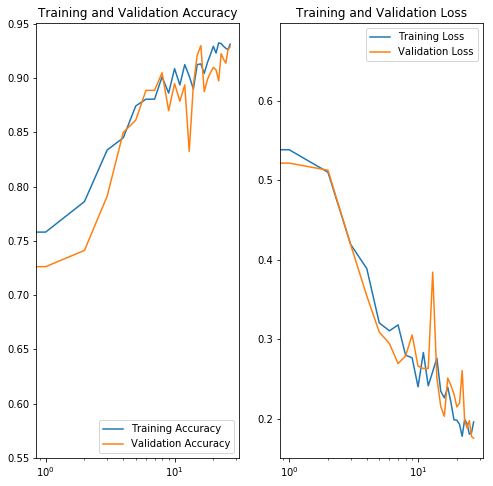

In [16]:
# Defining the accuracy and loss function 
acc_f = history_f.history['accuracy']
val_acc_f = history_f.history['val_accuracy']

loss_f = history_f.history['loss']
val_loss_f = history_f.history['val_loss']

In [50]:
tot_epochs = len(acc_f) # To know the number of considered epochs
print('The total of epochs :', tot_epochs)


The total of epochs : 28


In [ ]:
epochs_range = range(tot_epochs) # To set the limits for the plot

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.semilogx(epochs_range, acc_f, label='Training Accuracy')
plt.semilogx(epochs_range, val_acc_f, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.semilogx(epochs_range, loss_f, label='Training Loss')
plt.semilogx(epochs_range, val_loss_f, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Making predictions

Now that we have a trained model, we can proceed with the predictions. We consider $90$ images, $45$ for each equipe. We check the accuracy on the prediction set and we utilize the confusion matrix to know which team will win this home match of T-shirt recognition.

We set the prediction set with a "fake batch", in this case is the number of images that we want to predict.

In [17]:
# Setting the prediction set
fake_batch = 90
pred_set = keras.preprocessing.image_dataset_from_directory(
  'Dataset/Test',
  seed=0,
  image_size=(img_height, img_width),
  batch_size=fake_batch)

pred_set = pred_set.prefetch(buffer_size=AUTOTUNE) # To a better performance

Found 90 files belonging to 2 classes.


In [18]:
loss, accuracy = cnn_model_f.evaluate(pred_set) # Checking the prediction set on the model

1/1 [==============================] - 5s 5s/step - loss: 0.2211 - accuracy: 0.9444


Confusion Matrix 

[[25 20]
 [17 28]]


0.5888888888888889




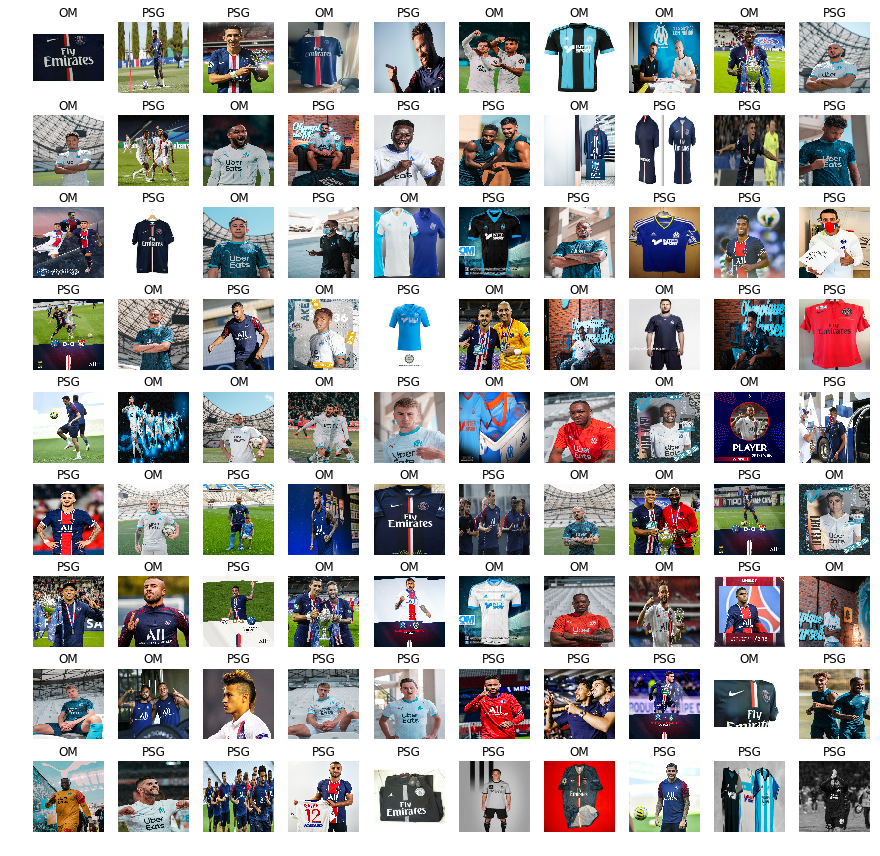

In [19]:
#Retrieve a batch of images from the test set
image_batch, label_batch = pred_set.as_numpy_iterator().next()

# Apply a sigmoid since our model returns logits
predictions = cnn_model_f.predict(pred_set).flatten() # To predict
predictions = tf.where(predictions < 0.5, 0, 1) # To define the predicted class


from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(label_batch, predictions.numpy()) # To measure the accuracy
acc = accuracy_score(label_batch, predictions.numpy()) # To make the confusion matrix

print('Confusion Matrix \n')
print(cm)
print('\n')
print(acc)
print('\n')

# Visualizing the predictions and the labels
plt.figure(figsize=(15, 15))
for i in range(90):
    ax = plt.subplot(9, 10, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]])
    plt.axis("off")

## Remarks about the models made by hand



# Build the CNN with pre-trained MobileNet V2 model

As said in the **[TensorFlow](https://www.tensorflow.org/tutorials/images/transfer_learning)** website:

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. You either use the pretrained model as is or use transfer learning to customize this model to a given task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

## Setting the images, training and test set

Following the instructions by TensorFlow we set the images, training and test set as

In [6]:
IMG_SHAPE = (160, 160) # Size of image

In [7]:
train_set_t = keras.preprocessing.image_dataset_from_directory(
  'Dataset/Training',
  shuffle=True,
  image_size=IMG_SHAPE,
  batch_size=batch_size) # Training set

Found 1600 files belonging to 2 classes.


In [8]:
test_set_t = keras.preprocessing.image_dataset_from_directory(
  'Dataset/Validation',
  shuffle=True,
  image_size=IMG_SHAPE,
  batch_size=batch_size) # Test set

Found 800 files belonging to 2 classes.


## Downloading the base model from the **MobileNet V2**

**From TensorFlow**

The MobileNet V2 is a model developed at Google. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories like jackfruit and syringe. This base of knowledge will help us classify cats and dogs from our specific dataset.

### Downloading

In [9]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input # To download

### Rescaling the images

**From TensorFlow**

In a moment, you will download tf.keras.applications.MobileNetV2 for use as your base model. This model expects pixel vaues in $[-1,1]$, but at this point, the pixel values in your images are in $[0,-255]$.

In [10]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

## Creating the base model

**From TensorFlow**

First, you need to pick which layer of MobileNet V2 you will use for feature extraction. The very last classification layer (on "top", as most diagrams of machine learning models go from bottom to top) is not very useful. Instead, you will follow the common practice to depend on the very last layer before the flatten operation. This layer is called the "bottleneck layer". The bottleneck layer features retain more generality as compared to the final/top layer.

First, instantiate a MobileNet V2 model pre-loaded with weights trained on ImageNet. By specifying the include_top=False argument, you load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [11]:
IMG_SHAPE = IMG_SHAPE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet') # Create the base model from the pre-trained model MobileNet V2

We need to convert the image size $(160x160x3)$ into $(5x5x1280)$. Here, an example to one batch of images.

In [12]:
image_batch, label_batch = next(iter(train_set_t))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


## Feature extraction

**From TensorFlow**

In this step, you will freeze the convolutional base created from the previous step and to use as a feature extractor. Additionally, you add a classifier on top of it and train the top-level classifier.

*Freeze the convolutional base*

It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. MobileNet V2 has many layers, so setting the entire model's trainable flag to False will freeze all of them.

In [13]:
base_model.trainable = False

### Summary base model

In [14]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

## Building the model

### Add a classification head

**From TensorFlow**

To generate predictions from the block of features, average over the spatial 5x5 spatial locations, using a tf.keras.layers.GlobalAveragePooling2D layer to convert the features to a single 1280-element vector per image.

In [15]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


Apply a tf.keras.layers.Dense layer to convert these features into a single prediction per image. You don't need an activation function here because this prediction will be treated as a logit, or a raw prediction value. Positive numbers predict class 1, negative numbers predict class 0.

In [16]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


### The model

In [17]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

## Compiling the model

In [18]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Summary model - final model

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281  

In [20]:
len(model.trainable_variables)

2

## Training the model

In [21]:
initial_epochs = 25

loss0, accuracy0 = model.evaluate(test_set_t)

25/25 [==============================] - 18s 541ms/step - loss: 0.7883 - accuracy: 0.5212


In [22]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.78
initial accuracy: 0.52


In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(train_set_t,
                    epochs=initial_epochs,
                    validation_data=test_set_t,
                    callbacks=[callback])

Epoch 1/25
50/50 [==============================] - 51s 944ms/step - loss: 0.7728 - accuracy: 0.5375 - val_loss: 0.7291 - val_accuracy: 0.5425
Epoch 2/25
50/50 [==============================] - 44s 829ms/step - loss: 0.7016 - accuracy: 0.5869 - val_loss: 0.6944 - val_accuracy: 0.5713
Epoch 3/25
50/50 [==============================] - 47s 888ms/step - loss: 0.6583 - accuracy: 0.6244 - val_loss: 0.6617 - val_accuracy: 0.6175
Epoch 4/25
50/50 [==============================] - 47s 888ms/step - loss: 0.6160 - accuracy: 0.6500 - val_loss: 0.6343 - val_accuracy: 0.6400
Epoch 5/25
50/50 [==============================] - 50s 947ms/step - loss: 0.5970 - accuracy: 0.6681 - val_loss: 0.6152 - val_accuracy: 0.6550
Epoch 6/25
50/50 [==============================] - 44s 819ms/step - loss: 0.5602 - accuracy: 0.7044 - val_loss: 0.5914 - val_accuracy: 0.6675
Epoch 7/25
50/50 [==============================] - 43s 818ms/step - loss: 0.5433 - accuracy: 0.7131 - val_loss: 0.5723 - val_accuracy: 0.6900

## Learning curves (Accuracy and loss function)

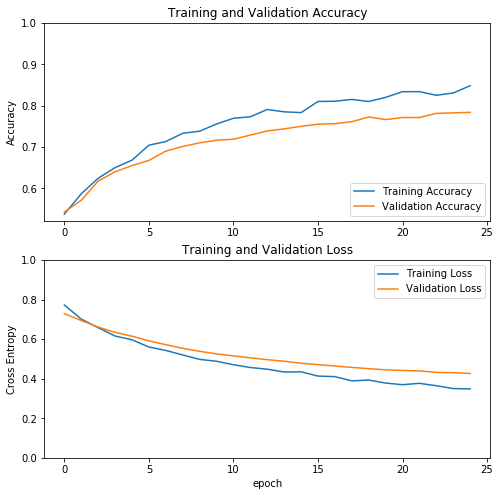

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Making predictions

### Setting the prediction set

In [25]:
pred_set_t = keras.preprocessing.image_dataset_from_directory(
  'Dataset/Test',
  shuffle=True,
  image_size=(160, 160),
  batch_size=90)
##pred_set_t = pred_set_t.prefetch(buffer_size=AUTOTUNE) # To a better performance

Found 90 files belonging to 2 classes.


In [26]:
loss, accuracy = model.evaluate(pred_set_t)
print('Test accuracy :', accuracy)

1/1 [==============================] - 2s 2s/step - loss: 0.3953 - accuracy: 0.7333
Test accuracy : 0.7333333492279053


Accuracy 

0.8
Confusion Matrix 

[[43  2]
 [16 29]]




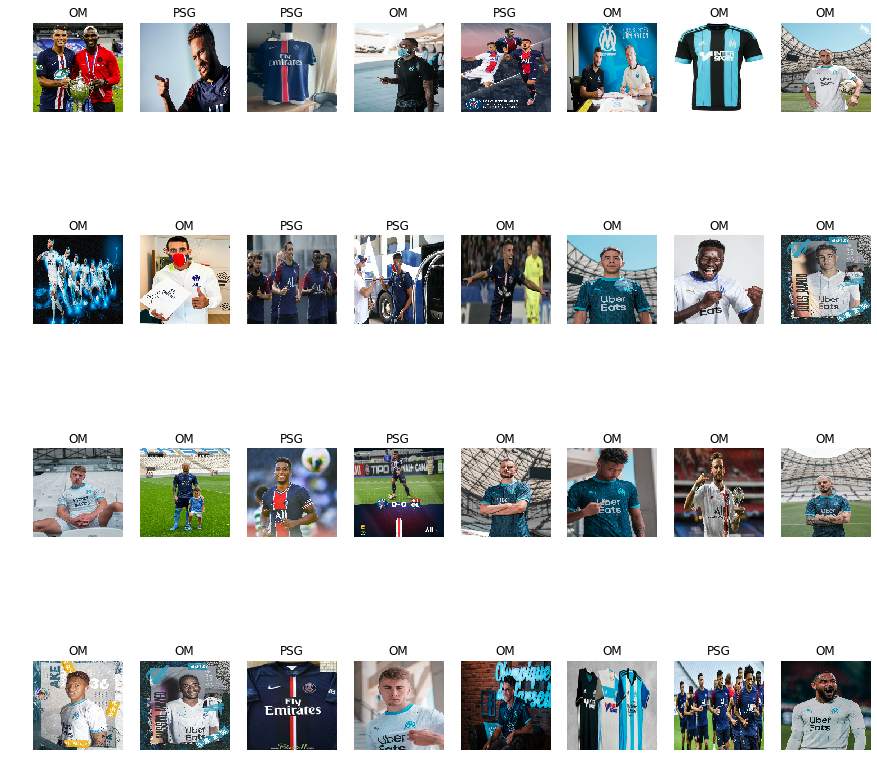

In [27]:
#Retrieve a batch of images from the test set
image_batch, label_batch = pred_set_t.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_t = confusion_matrix(label_batch, predictions.numpy())
acc_t = accuracy_score(label_batch, predictions.numpy())
print('Accuracy \n')
print(acc_t)
print('Confusion Matrix \n')
print(cm_t)
print('\n')

plt.figure(figsize=(15, 15))
for i in range(32):
    ax = plt.subplot(4, 8, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]])
    plt.axis("off")

# Conclusion

